<h1>Bible<h1>

Number Of Words After Tokenization: 854026 

Number Of Words After Removing StopWords: 437135 

Most Common 10 Words: 

shall :  9838 

unto :  8997 

lord :  8006 

thou :  5474 

god :  4716 

thi :  4600 

said :  3999 

ye :  3987 

thee :  3827 

son :  3486 



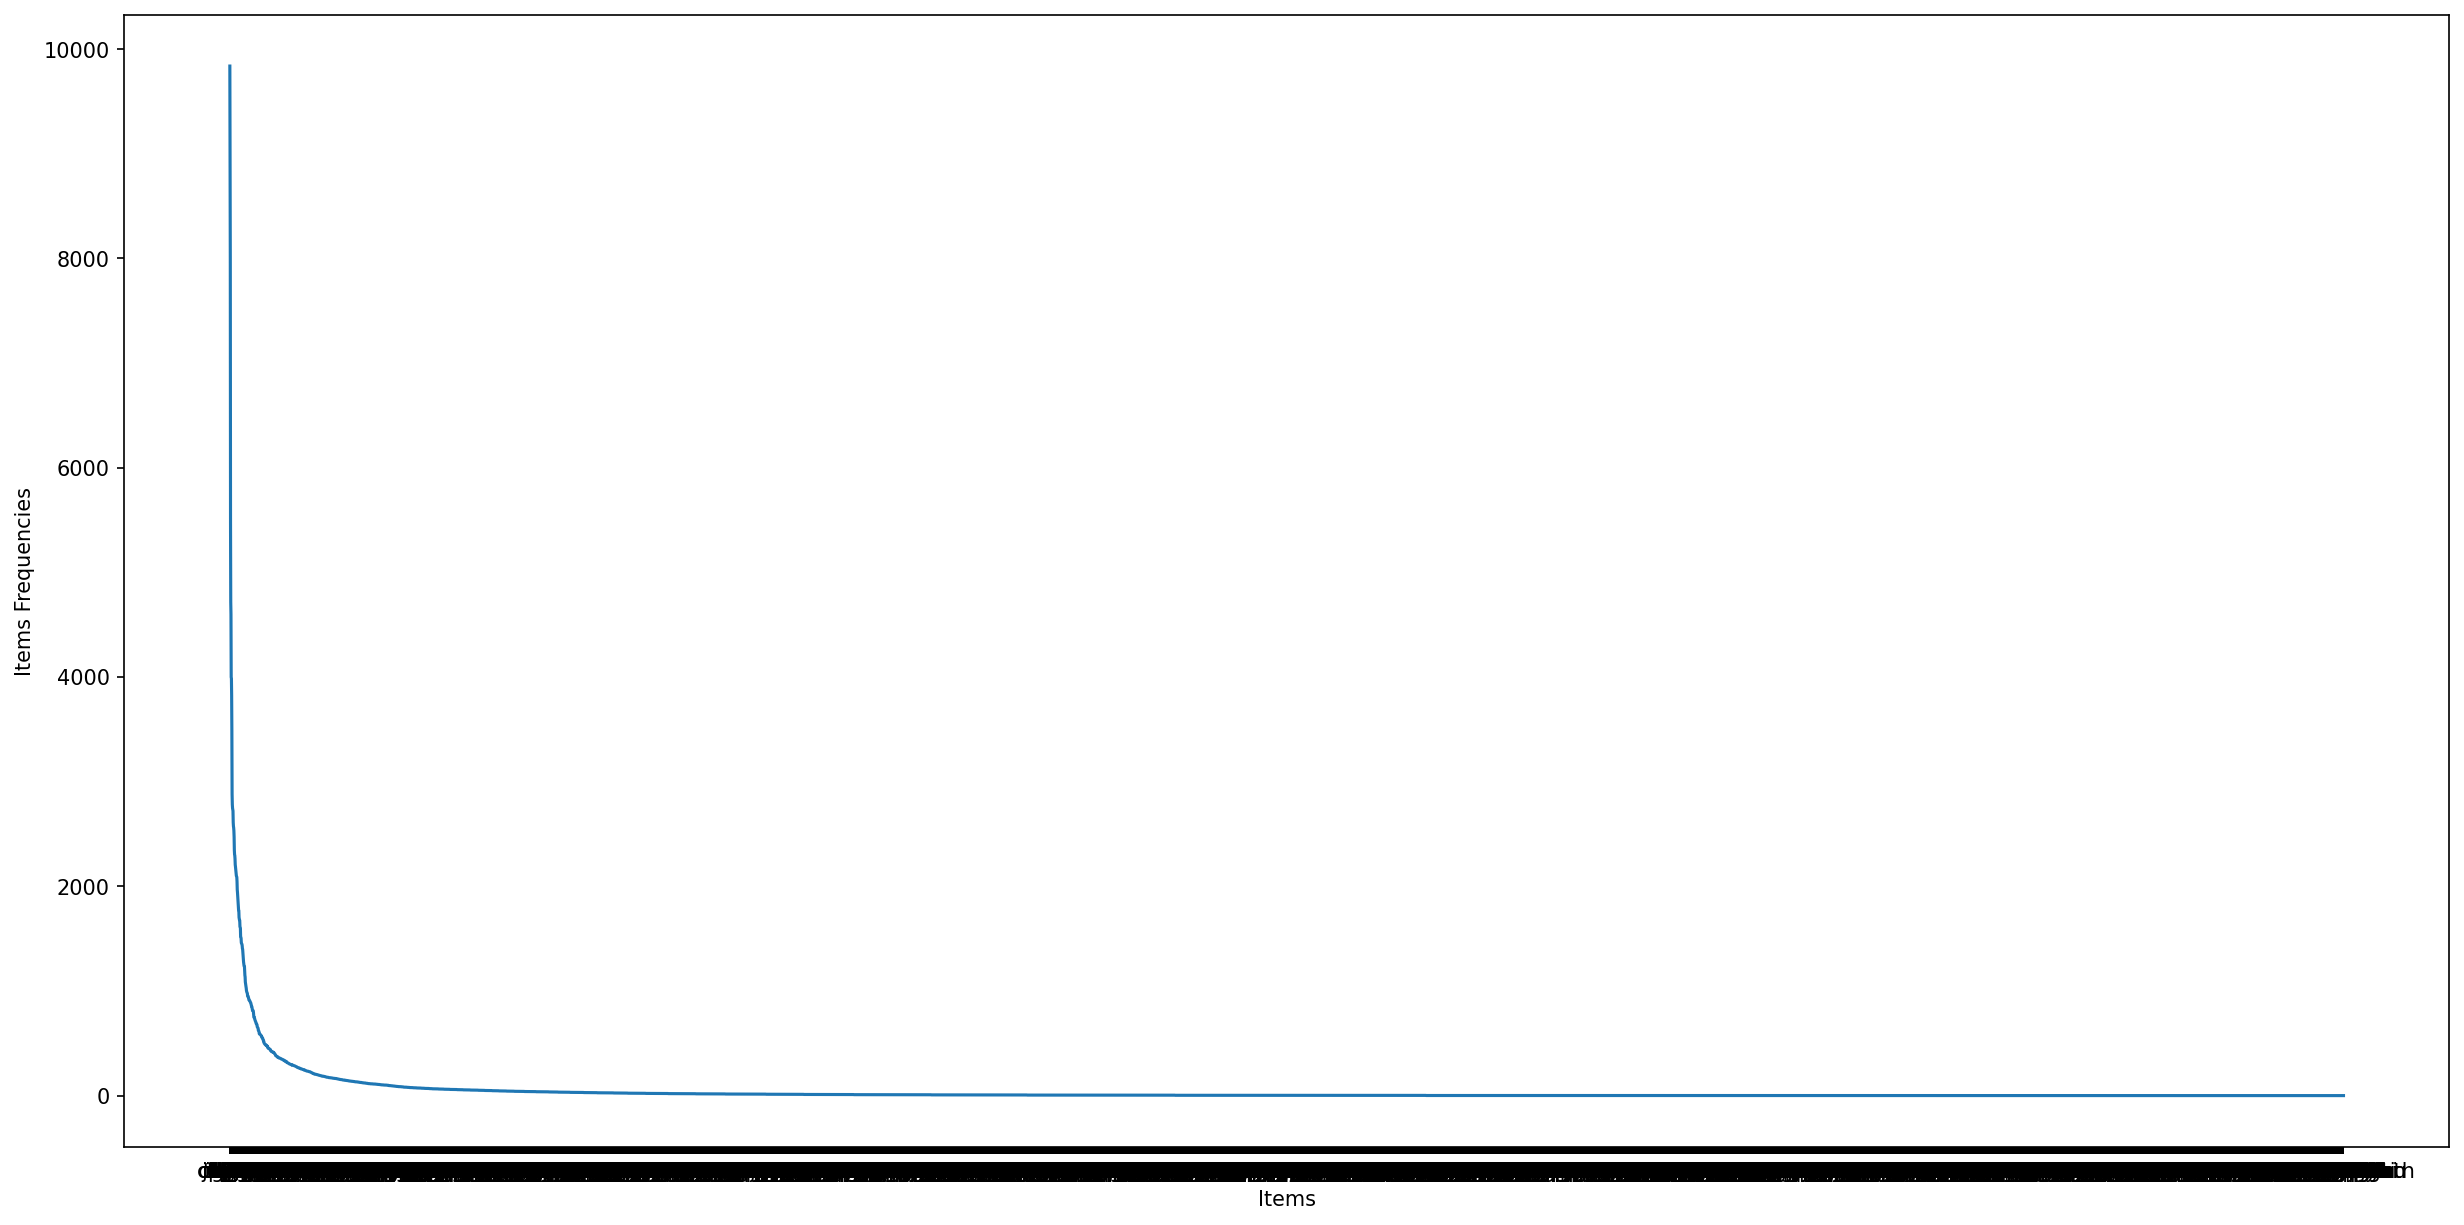

In [19]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

#! Loading data from file
fileResult = 'bible_after_preprocessing.txt'
fileName = 'bible.txt'
try:
    file = open(fileName, 'r')
except:
    print('File not found')
text = file.read()
file.close()

#! Tokenization
tokenizer = RegexpTokenizer("[\w]+")
tokens = tokenizer.tokenize(text.lower())

print('Number Of Words After Tokenization:', len(tokens) ,'\n')

#! Remove Stop Words & Stemming
stopWords = set(stopwords.words("english"))
items = []
for token in tokens:
    if token not in stopWords:
        items.append(PorterStemmer().stem(token))

print('Number Of Words After Removing StopWords:', len(items)  ,'\n')


#! Generating fileResult
with open(fileResult, 'w') as newFile:
    for item in items:
        newFile.write(item + '\n')

#! Items Frequencies
countered = OrderedDict(sorted(Counter(items).items(), key=lambda x: x[1], reverse=True))

#! Most Common 10 Words
mostCommonWord = {}
i = 0
for mcw in countered:
    if i < 10:
        mostCommonWord[mcw] = countered[mcw]
        i += 1

print('Most Common 10 Words: \n')
for item in mostCommonWord:
    print(item, ': ', mostCommonWord[item], '\n' )

#! Items Frequencies Plot
plt.figure(figsize=( 20, 10 ), dpi=150)
plt.plot(countered.keys(), countered.values())
plt.ylabel('Items Frequencies')
plt.xlabel('Items')
plt.show()
